<h1>Are humanities scholars getting migrants right?</h1>

<h3>Packages & Options</h3>

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

In [2]:
import re

In [3]:
import nltk

In [4]:
from wordcloud import WordCloud

In [5]:
import matplotlib.pyplot as plt

In [6]:
import geograpy

In [7]:
from nltk.corpus import wordnet as wn

In [56]:
import numpy as np

In [58]:
from PIL import Image

<h3>Data source</h3>

Data obtained using a <a href = "https://www-scopus-com.proxy3.library.mcgill.ca/search/form.uri?display=advanced&clear=t&origin=searchbasic&txGid=952c4a98981c2c23859c8d5ffe640b22"> Scopus document search </a> using the following criteria: 

(SUBJAREA(ARTS) AND KEY(migration) AND PUBSTAGE(Final) AND DOCTYPE(ar) AND LANGUAGE(English) AND PUBYEAR = 2015 OR PUBYEAR = 2016

The search results were refined to exclude journals associated with disciplines outside of HASS as well as articles not originally published in English. 

<h3>Import & Examine Data</h3>

In [8]:
df = pd.read_csv('scopus-6.csv')
df[0:1]

,Title,Year,Source title,Link,Abstract,Author Keywords,Index Keywords
0,Migration and the mare nostrum: Alternative staging techniques in Mar Gómez Glez’s Cifras,2020,Romance Quarterly,https://www.scopus.com/inward/record.uri?eid=2-s2.0-85080948315&doi=10.1080%2f08831157.2020.1733849&partnerID=40&md5=b9e28dcdd4bb8c85ddb9ad44ce7c2019,"Mar Gómez Glez’s play Cifras (2012) stages the real-life events that transpired in July 2006, when the Spanish fishing boat Francisco y Catalina was forced into a weeklong maritime standstill off the coast of Malta after bringing onboard fifty-one migrants stranded in the Mediterranean Sea. Through this interpretive frame, Gómez Glez’s play both contributes to a thematic trend in the landscape of contemporary Spanish theater that places the dynamics of migration center stage while at the same time presenting a significant departure from such preexisting dramatic production. Subverting audience expectations, the fifty-one migrants are never endowed with physical presence on stage and are instead constructed through an array of linguistic and dramatic techniques. Although, we never see the migrants, Gómez Glez’s use of linguistic references, grammatical indicators, and staging signs nevertheless renders their presence as impossible to ignore. This article advances a reading of Cifras wherein the physical invisibility of the migrant characters is viewed as a conscious ethical technique by the playwright that calls attention to mediatized visual representations and current political discourses on migration. Read in this light, the work becomes poignantly relevant in the recent global context of punitive politics discouraging humanitarian rescues in the Mediterranean, the rise of a social discourse on migrant psychology and social welfare, and the continued environmental impacts generated by global warming. © 2020, © 2020 Taylor & Francis Group, LLC.",Cifras; Mediterranean; migration; staging; theater,NaN


In [9]:
#Drop the "text" and "entities" columns that Sunyam is working on. 
#Also dropping time because it is redundant with "created_at"
df = df.drop(['Year','Source title', 'Link', 'Author Keywords', 'Index Keywords'], axis=1)
df[1:10]

,Title,Abstract
1,‘Me among the Turks?’: Western commanders in the Late Ottoman Army and their self-narratives,"Throughout the nineteenth century several Western officers joined the Ottoman Army. Not a few adopted Ottoman citizenship, commanded troops, fought in major wars, and rose to the highest echelons of the military. For these men the Ottoman Empire represented a formidable military power, notwithstanding contemporary discourses about its supposed decline. Asking what prompted these military men to emigrate, this article elucidates how they reconciled, for themselves, some of the putative contradictions of their positions as (former) Christian men in the military body of an Empire that drew on Islam as its main source of legitimacy. How did they try to make sense of what they were doing and how did they later remember and represent their Ottoman travails to those they left behind? This article answers these questions through a close reading of the career and memoirs of the Belgian baron Charles de Schwartzenberg a.k.a. Emin Pasha (d. 1878), who was employed in the Ottoman Army for nearly two decades, fighting in the Crimean War before serving in Syria. Typical for the mercenary-like European officers who chose to venture abroad, his biography illuminates the kind of mobility that was possible in, and integral to, the late Ottoman military structure. © 2020, © 2020 Informa UK Limited, trading as Taylor & Francis Group."
2,MIGRATION AND NARRATION: HOW EUROPEAN HISTORIANS IN THE NINETEENTH AND EARLY TWENTIETH CENTURIES TOLD THE HISTORY OF HUMAN MASS MIGRATIONS OR VÖLKERWANDERUNGEN,"Historians’ interest in the history of human migrations is not limited to recent years. Migrations had already figured as explanatory factors in connection with cultural and historical change in the work of classical and ancient studies scholars of the late nineteenth and early twentieth centuries. In the writings of these scholars, migrations acted as historical landmarks or epochal thresholds and played a key role in the construction of geo-historical areas. This model has been called “migrationism” and cannot be explained simply on the basis of the history of individual disciplines, but must be seen in its complex interaction with scientific and historical contexts. However, “migrationism” does not relate to fixed political and scientific positions or movements. For this reason, it cannot be explained adequately by using a historically or ideologically based approach. Relying on narratological approaches, this article examines migration narratives that historians of this period used to explain the rise and fall of ancient civilizations. Referring to contemporary historiographical representations of the ancient Near East, it distinguishes three main narratives that are still common today: narratives of foundation, narratives of destruction, and narratives of mixtures. In this sense, analyzing older migration narratives helps us to sharpen the critical view on the genealogy of our own views on the history—and present—of human migrations. © 2020 The Author. History and Theory published by Wiley Periodicals, Inc. on behalf of Wesleyan University"
3,Externalized Migration Governance and the Limits of Sovereignty: The Case of Partnership Agreements between EU and Libya,"Can state sovereignty justify privileged receiving countries exercising authority over non-members in a third country to safeguard their own interests? Under the current migration governance of the EU, state sovereignty is manifested in migrant interdiction, interception and detention policies employed to prevent unauthorized migrants from reaching the EU, and even from attempting to embark on cross-Mediterranean journeys. While reinforcement of the Schengen region's external borders is a key aim of the EU's internal migration politics, collaboration with third countries regarding migration control has, in the last decade, become a key feature of its external migration policy. In clo

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 2 columns):
Title       458 non-null object
Abstract    458 non-null object
dtypes: object(2)
memory usage: 7.2+ KB


<h3>Omit Copyright Statement</h3>

In [11]:
df['Abstract'].str.contains(r"\s\©.*$").value_counts()

True     361
False    97 
Name: Abstract, dtype: int64

In [12]:
df['Abstract'] = df['Abstract'].replace(regex=r"\s\©.*$", value='')

In [13]:
df[1:10]

,Title,Abstract
1,‘Me among the Turks?’: Western commanders in the Late Ottoman Army and their self-narratives,"Throughout the nineteenth century several Western officers joined the Ottoman Army. Not a few adopted Ottoman citizenship, commanded troops, fought in major wars, and rose to the highest echelons of the military. For these men the Ottoman Empire represented a formidable military power, notwithstanding contemporary discourses about its supposed decline. Asking what prompted these military men to emigrate, this article elucidates how they reconciled, for themselves, some of the putative contradictions of their positions as (former) Christian men in the military body of an Empire that drew on Islam as its main source of legitimacy. How did they try to make sense of what they were doing and how did they later remember and represent their Ottoman travails to those they left behind? This article answers these questions through a close reading of the career and memoirs of the Belgian baron Charles de Schwartzenberg a.k.a. Emin Pasha (d. 1878), who was employed in the Ottoman Army for nearly two decades, fighting in the Crimean War before serving in Syria. Typical for the mercenary-like European officers who chose to venture abroad, his biography illuminates the kind of mobility that was possible in, and integral to, the late Ottoman military structure."
2,MIGRATION AND NARRATION: HOW EUROPEAN HISTORIANS IN THE NINETEENTH AND EARLY TWENTIETH CENTURIES TOLD THE HISTORY OF HUMAN MASS MIGRATIONS OR VÖLKERWANDERUNGEN,"Historians’ interest in the history of human migrations is not limited to recent years. Migrations had already figured as explanatory factors in connection with cultural and historical change in the work of classical and ancient studies scholars of the late nineteenth and early twentieth centuries. In the writings of these scholars, migrations acted as historical landmarks or epochal thresholds and played a key role in the construction of geo-historical areas. This model has been called “migrationism” and cannot be explained simply on the basis of the history of individual disciplines, but must be seen in its complex interaction with scientific and historical contexts. However, “migrationism” does not relate to fixed political and scientific positions or movements. For this reason, it cannot be explained adequately by using a historically or ideologically based approach. Relying on narratological approaches, this article examines migration narratives that historians of this period used to explain the rise and fall of ancient civilizations. Referring to contemporary historiographical representations of the ancient Near East, it distinguishes three main narratives that are still common today: narratives of foundation, narratives of destruction, and narratives of mixtures. In this sense, analyzing older migration narratives helps us to sharpen the critical view on the genealogy of our own views on the history—and present—of human migrations."
3,Externalized Migration Governance and the Limits of Sovereignty: The Case of Partnership Agreements between EU and Libya,"Can state sovereignty justify privileged receiving countries exercising authority over non-members in a third country to safeguard their own interests? Under the current migration governance of the EU, state sovereignty is manifested in migrant interdiction, interception and detention policies employed to prevent unauthorized migrants from reaching the EU, and even from attempting to embark on cross-Mediterranean journeys. While reinforcement of the Schengen region's external borders is a key aim of the EU's internal migration politics, collaboration with third countries regarding migration control has, in the last decade, become a key feature of its external migration policy. In close collaboration with third countries, the EU has managed to curb the outflux of migrants from transit and sending countries. In effect, irregular migrants are prevented from exi

<h3>75 most frequent words (Abstract)</h3>

In [15]:
# Make everything in the Abstract column lowercase and concatenate entries into one string.
abstractText = df['Abstract'].str.lower().str.cat(sep=' ')
abstractText[0:500]

'mar gómez glez’s play cifras (2012) stages the real-life events that transpired in july 2006, when the spanish fishing boat francisco y catalina was forced into a weeklong maritime standstill off the coast of malta after bringing onboard fifty-one migrants stranded in the mediterranean sea. through this interpretive frame, gómez glez’s play both contributes to a thematic trend in the landscape of contemporary spanish theater that places the dynamics of migration center stage while at the same ti'

In [16]:
# Tokenize the words
abstractTokens = nltk.tokenize.word_tokenize(abstractText)
abstractTokens[0:10]

['mar', 'gómez', 'glez', '’', 's', 'play', 'cifras', '(', '2012', ')']

In [17]:
# Omit punctuation
abstractWords = [word for word in abstractTokens if word[0].isalpha()]
print(abstractWords[0:10])

['mar', 'gómez', 'glez', 's', 'play', 'cifras', 'stages', 'the', 'real-life', 'events']


In [18]:
#Most frequent words
abstractFreqWord = nltk.FreqDist(abstractWords)
print(abstractFreqWord.most_common(75))

[('the', 5266), ('of', 3675), ('and', 2738), ('in', 2047), ('to', 1653), ('a', 1262), ('this', 716), ('as', 677), ('that', 675), ('on', 531), ('migration', 506), ('is', 505), ('by', 419), ('for', 413), ('from', 412), ('with', 403), ('article', 344), ('it', 326), ('their', 322), ('an', 278), ('are', 261), ('which', 244), ('was', 227), ('s', 196), ('these', 194), ('migrants', 187), ('new', 173), ('has', 166), ('between', 163), ('have', 159), ('not', 158), ('how', 158), ('be', 158), ('or', 156), ('who', 145), ('its', 141), ('also', 140), ('were', 139), ('at', 137), ('social', 137), ('they', 133), ('into', 132), ('paper', 127), ('through', 120), ('but', 119), ('political', 116), ('migrant', 112), ('two', 112), ('been', 111), ('world', 110), ('his', 109), ('african', 109), ('cultural', 108), ('people', 108), ('i', 104), ('both', 101), ('other', 101), ('history', 99), ('religious', 99), ('one', 96), ('about', 95), ('we', 94), ('can', 93), ('within', 92), ('more', 92), ('women', 90), ('centur

In [15]:
# Get stopwords
stopwords = nltk.corpus.stopwords.words("english")

In [20]:
# Test stopwords
print("sample words: ", abstractWords[1:10])
print("sample words not in stopwords list: ", [word for word in abstractWords[1:10] if not word in stopwords])

sample words:  ['gómez', 'glez', 's', 'play', 'cifras', 'stages', 'the', 'real-life', 'events']
sample words not in stopwords list:  ['gómez', 'glez', 'play', 'cifras', 'stages', 'real-life', 'events']


In [21]:
# Most frequent words minus stopwords
abstractContent = [word for word in abstractWords if word not in stopwords]
abstractFreqContent = nltk.FreqDist(abstractContent)
print(abstractFreqContent.most_common(75))

[('migration', 506), ('article', 344), ('migrants', 187), ('new', 173), ('also', 140), ('social', 137), ('paper', 127), ('political', 116), ('migrant', 112), ('two', 112), ('world', 110), ('african', 109), ('cultural', 108), ('people', 108), ('history', 99), ('religious', 99), ('one', 96), ('within', 92), ('women', 90), ('century', 86), ('european', 83), ('life', 82), ('identity', 81), ('church', 79), ('africa', 79), ('well', 78), ('study', 78), ('context', 75), ('research', 75), ('global', 74), ('experiences', 72), ('part', 72), ('economic', 72), ('south', 72), ('experience', 71), ('population', 70), ('community', 68), ('first', 67), ('different', 67), ('role', 66), ('war', 65), ('many', 65), ('time', 64), ('contemporary', 61), ('novel', 60), ('argues', 60), ('colonial', 60), ('transnational', 60), ('countries', 59), ('examines', 58), ('work', 57), ('human', 57), ('historical', 57), ('based', 57), ('practices', 56), ('immigration', 56), ('states', 56), ('among', 55), ('national', 55),

<h3>Visualize</h3>

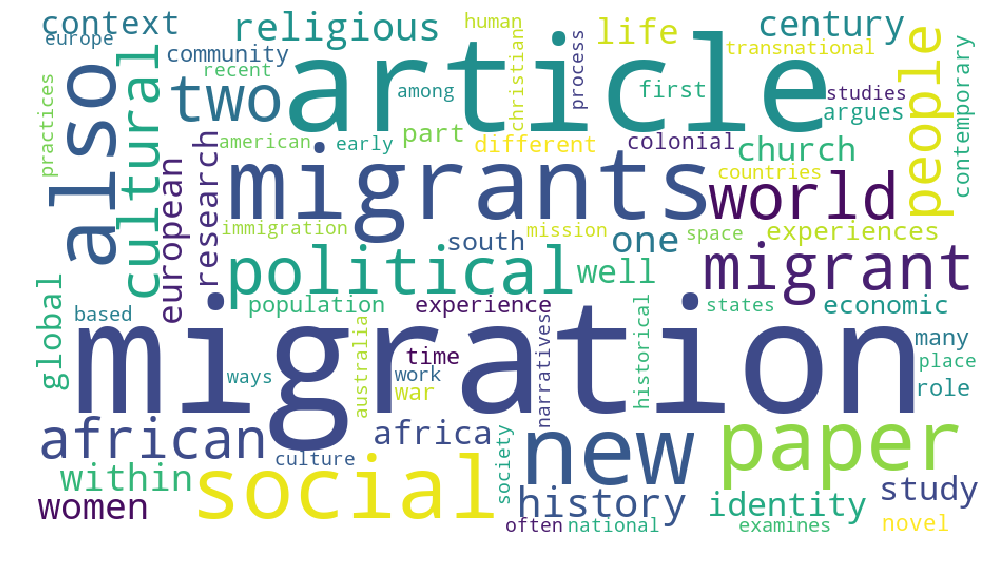

In [36]:
# Make a wordcloud
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=75,
                      background_color="white").generate_from_frequencies(abstractFreqContent)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<h3>75 most frequent words (Title)</h3>

In [19]:
# Make everything in the Title column lowercase and concatenate entries into one string.
titleText = df['Title'].str.lower().str.cat(sep=' ')

# Tokenize the words
titleTokens = nltk.tokenize.word_tokenize(titleText)

# Omit punctuation
titleWords = [word for word in titleTokens if word[0].isalpha()]
      
# Most frequent words minus stopwords
titleContent = [word for word in titleWords if word not in stopwords]
titleFreqContent = nltk.FreqDist(titleContent)
print(titleFreqContent.most_common(75))

[('migration', 130), ('migrants', 25), ('world', 20), ('migrant', 19), ('new', 18), ('church', 16), ('de', 16), ('african', 16), ('case', 15), ('diaspora', 15), ('women', 15), ('mission', 15), ('war', 13), ('australia', 13), ('global', 13), ('life', 13), ('africa', 13), ('history', 12), ('american', 12), ('study', 12), ('europe', 12), ('identity', 12), ('south', 12), ('population', 12), ('social', 11), ('refugee', 11), ('borders', 11), ('transnational', 11), ('home', 11), ('european', 10), ('migrations', 10), ('colonial', 10), ('chinese', 10), ('community', 10), ('theology', 10), ('hospitality', 10), ('religion', 10), ('cultural', 10), ('western', 9), ('early', 9), ('religious', 9), ('reading', 9), ('century', 9), ('crisis', 9), ('immigration', 9), ('black', 9), ('writing', 8), ('towards', 8), ('experience', 8), ('context', 8), ('christian', 8), ('west', 8), ('god', 8), ('city', 8), ('race', 8), ('southern', 8), ('globalization', 8), ('international', 8), ('centuries', 7), ('political'

In [20]:
print("Number of words: ", len(titleWords))
print("Number of content words: ", len(titleFreqContent))

Number of words:  6122
Number of content words:  2322


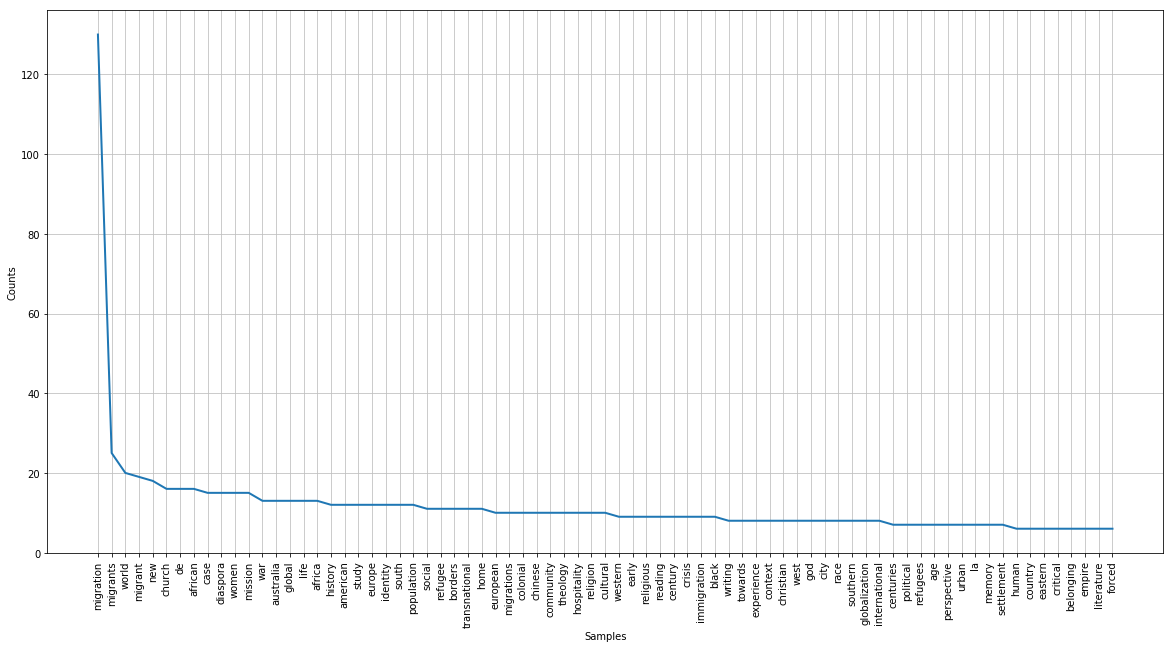

In [21]:
plt.rcParams["figure.figsize"] = (20,10)
titleFreqContent.plot(75)

<h3>Visualize</h3>

In [84]:
# Image sources from https://www.flickr.com/photos/siennasthetic/8744023515/
# CC BY-NC-SA 4.0.
cloud_mask = np.array(Image.open("cloud_mask.jpg"))
cloud_mask.shape

(360, 504)

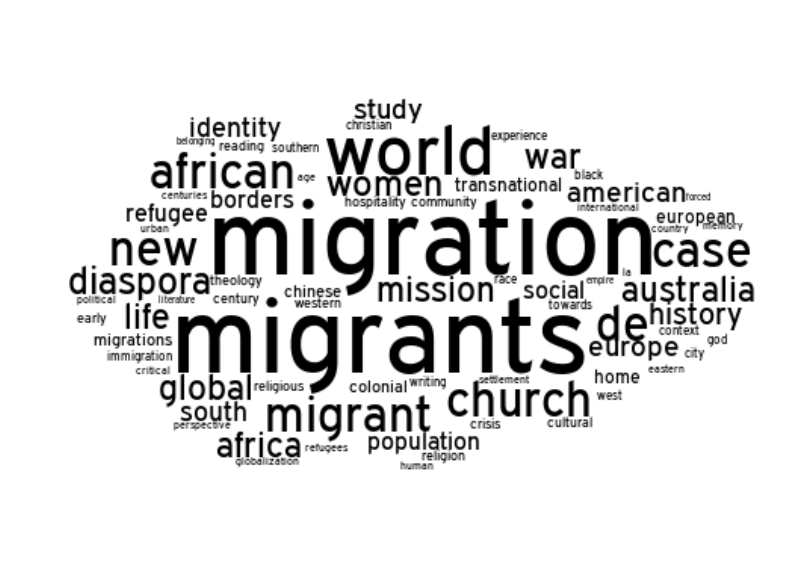

In [88]:
# Make a wordcloud
# Font acquired from https://www.fontzillion.com/fonts/typodermic-fonts/expressway
wordcloud = WordCloud(font_path="expressway_rg.ttf",
                      width=504, 
                      height=360, 
                      prefer_horizontal=1,
                      max_words=75,
                      mask = cloud_mask,
                      color_func=lambda *args, **kwargs: (0,0,0),
                      relative_scaling=0,
                      background_color="white").generate_from_frequencies(titleFreqContent)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [92]:
wordcloud.to_file('20200504_AM_HumanitiesReview.png')

<h3>Receiving versus sending country perspective</h3>

In [66]:
# Immi vesus emi
print("Abstracts, immigra:", 
      df['Abstract'].str.contains(r"immigra.*").value_counts()[1])
print("Abstracts, emigra:", 
      df['Abstract'].str.contains(r"emigra.*").value_counts()[1])
print("")

print("Titles, immigra:",
      df['Title'].str.contains(r"immigra.*").value_counts()[1])
print("Titles, emigra:",
      df['Title'].str.contains(r"emigra.*").value_counts()[1])

Abstracts, immigra: 79
Abstracts, emigra: 27

Titles, immigra: 14
Titles, emigra: 5


Abstracts, Countries: [('Central African Republic', 115), ('British Indian Ocean Territory', 83), ('European', 71), ('United Kingdom', 46), ('Australia', 46), ('American', 45), ('Europe', 41), ('German Democratic Republic', 41), ('Chinese', 39), ('US Miscellaneous Pacific Islands', 39)]


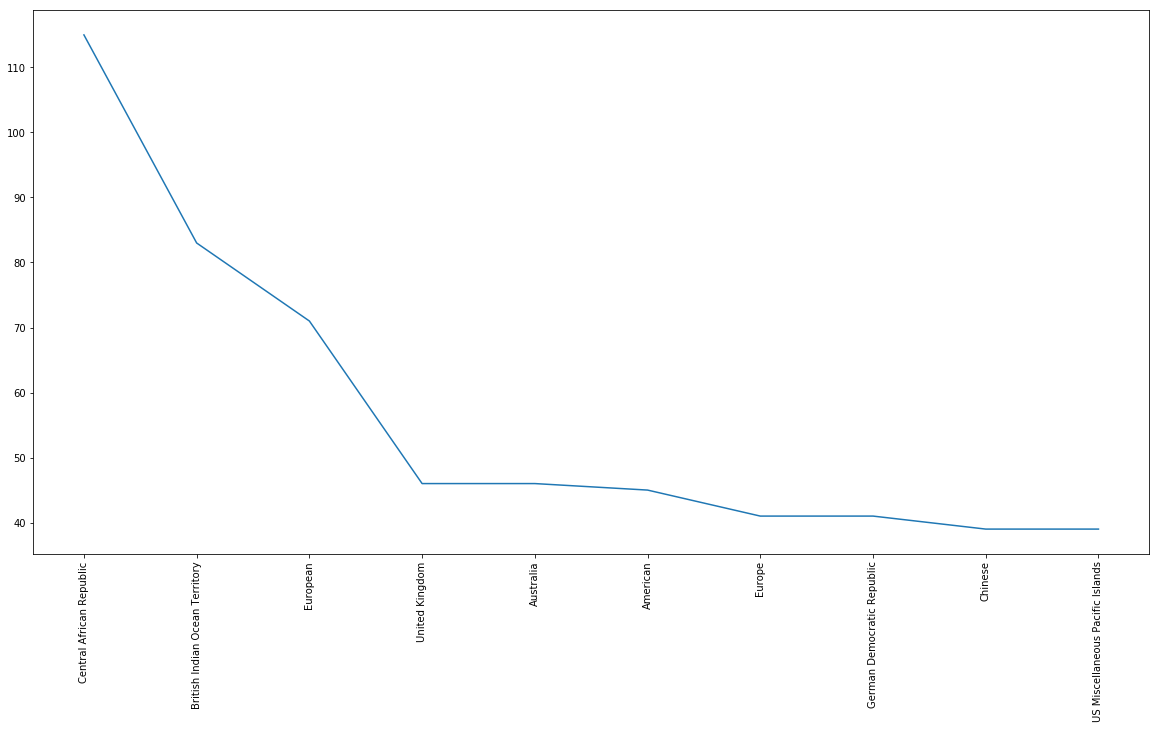

In [183]:
# Country and region mentions for ABSTRACTS
abstractGeo = df['Abstract'].str.cat(sep=' ') #Prep Data
abstractPlaces = geograpy.get_place_context(url=None, text=abstractGeo) # Get geopolitical entities
print("Abstracts, Countries:", abstractPlaces.country_mentions[:10]) # View top 10

# Visualize
x_list = [l[0] for l in abstractPlaces.country_mentions[:10]] # Get names of top 10
y_list = [l[1] for l in abstractPlaces.country_mentions[:10]] # Get associated counts
plt.plot(x_list, y_list) # Plot data
plt.xticks(rotation=90) # Rotate x-axis labels
plt.show() # View graph

In [197]:
abstractPlaces = geograpy.get_place_context(url=None, text=abstractGeo) # Get geopolitical entities
print("Abstracts, Regions:", abstractPlaces.region_mentions[:75]) # View top 75

Abstracts, Regions: [('African', 114961), ('European', 106003), ('Australia', 68678), ('American', 67185), ('British', 64199), ('Europe', 61213), ('Chinese', 58227), ('Christian', 56734), ('South Africa', 49269), ('Africa', 47776), ('United States', 43297), ('Italy', 41804), ('Italian', 40311), ('Indian', 40311), ('Australian', 37325), ('German', 35832), ('Christ', 32846), ('Britain', 31353), ('Islam', 29860), ('South', 28367), ('French', 26874), ('Germany', 25381), ('France', 25381), ('Brazil', 23888), ('English', 20902), ('Turkish', 20902), ('God', 20902), ('Asian', 20902), ('EU', 19409), ('Migration', 19409), ('Dutch', 19409), ('Muslim', 19409), ('China', 16423), ('England', 16423), ('Church', 16423), ('Rome', 16423), ('Japan', 16423), ('Spanish', 14930), ('Paris', 14930), ('Canada', 14930), ('America', 14930), ('Norway', 14930), ('London', 14930), ('Christianity', 14930), ('Americas', 14930), ('Pacific', 14930), ('New Zealand', 14930), ('Catholic', 13437), ('Second', 13437), ('Indi

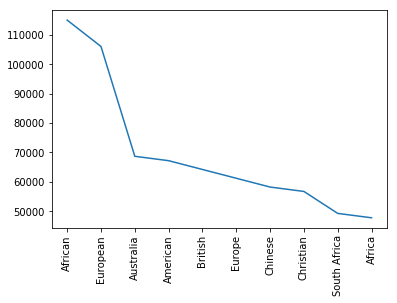

In [160]:
# Visualize
x_list = [l[0] for l in abstractPlaces.region_mentions[:10]] # Get names of top 10
y_list = [l[1] for l in abstractPlaces.region_mentions[:10]] # Get associated counts
plt.plot(x_list, y_list) # Plot data
plt.xticks(rotation=90) # Rotate x-axis labels
plt.show() # View graph

<h3>Other Terms</h3>

In [167]:
nltk.Text(titleTokens).concordance("social")

Displaying 11 of 11 matches:
nts in the ussr during world war ii social cohesion in australia : comparing c
ernationalist perspective : neither social democratic free circulation nor far
mbiguity of 'full integration ' the social degeneration of the habsburg home f
of island communities as a model of social organizing in the age of migrations
research methodologies in human and social sciences : on the use of intersecti
 women in spain a network society , social media , migration and mission missi
n : a feminist reading of the 1970s social report-books about migration policy
important composers the question of social support for collectivization unders
ot ; : farm women , domesticity and social change in interwar britain . housin
drain ' : natural scientists , meet social science crossing boundaries , claim
 realism cultural encounters in the social sciences and humanities : western é


In [173]:
for synset in wn.synsets("labour"):
    print(synset.name(), ": ", synset.definition())

labor.n.01 :  a social class comprising those who do manual labor or work for wages
parturiency.n.01 :  concluding state of pregnancy; from the onset of contractions to the birth of a child
british_labour_party.n.01 :  a political party formed in Great Britain in 1900; characterized by the promotion of labor's interests and formerly the socialization of key industries
labor.n.02 :  productive work (especially physical work done for wages)
labor.v.02 :  work hard
tug.v.02 :  strive and make an effort to reach a goal
labor.v.03 :  undergo the efforts of childbirth


In [174]:
labourSynset = wn.synset("labor.n.02")
print(labourSynset, labourSynset.definition())

Synset('labor.n.02') productive work (especially physical work done for wages)


In [184]:
nltk.Text(titleTokens).concordance("mission")

Displaying 15 of 15 matches:
gees and migrants in european media mission after the arusha conference on worl
fter the arusha conference on world mission and evangelism , 2018 race , exclus
tury diaspora : the local church on mission the integration of foreigners arriv
charlotte brontë ’ my pilgrimage in mission faithful doxology : the church ’ s 
 history of globalization christian mission and ministry in the context of cont
 of david fram furthering christ 's mission : international theological educati
rébin women in france and christian mission shamanism in motion , pentecostalis
interculturality for transformative mission the shi ‘ ite law of migration : pr
e margin ? the church on the move : mission in an age of migration common witne
 christ '' : peregrinations through mission and migration the upriver reach of 
iety , social media , migration and mission missionary diaconate : hope for mig
rüm decision and the european dream mission as liberation in socio-economic and
ntextual an

In [192]:
nltk.Text(titleTokens).concordance("women")

Displaying 15 of 15 matches:
enge to just hospitality pan-african women 's voices across borders : revisitin
he european union talk about migrant women and religion ? a critical discourse 
union and the case study of nigerian women from a returning jewish diaspora to 
 no country , no cry : literature of women ’ s displacement and the reading of 
 the empire windrush telling migrant women ’ s life stories as comics high-reso
an migration and the making of model women for japanese expansion in brazil and
psests of ancestral memories : black women ’ s collective identity development 
e for a voice [ no title available ] women cross borders : economic migration i
o e população javanesa no suriname ] women as migrants and missionaries at the 
: identity formation among maghrébin women in france and christian mission sham
ity to address the status of migrant women in spain a network society , social 
 : narrative innovations and migrant women 's aesthetics in giannina braschi an
 modern cou

In [193]:
nltk.Text(titleTokens).concordance("war")

Displaying 13 of 13 matches:
inner fronts in the ussr during world war ii social cohesion in australia : com
 theology . the example of post-world war ii german refugees and the inter-gene
rse ” and pows during the first world war community music as folkbildning : a s
s of migration in the soviet union at war ’ s end miles away : miss miles , a f
 the syrian revolution and the syrian war , flee and get asylum in austria [ re
ology and theology of migration world war i in the history of globalization chr
ly see and human mobility since world war ii thinking about populations and rac
nd and ukraine after the second world war : experience and memory are movers mo
the territory of croatia during world war two and in the after-war period [ emi
nel in ceylon during the second world war west indian interventions at the hear
 cartagena de indias , 1570-1640 from war service to domestic service : ex-serv
n nostalgia salman rushdie and the `` war on terror '' `` every morning before 
tral namibi

In [194]:
nltk.Text(titleTokens).concordance("identity")

Displaying 12 of 12 matches:
ex conceptualization spiritual and identity transformations of migrants : an a
syrian christians and arab-islamic identity : expressions of belonging in the 
ories : black women ’ s collective identity development in short stories by ed
's quest for an icelandic-american identity salvage : locating lives in the mi
omes an essential symbol of muslim identity : food practice as a lens into the
e : a vehicle of the intercultural identity of a city . the case study of the 
 at the crossroads of narratives : identity formation among maghrébin women in
alism on hold , and maya mormonism identity and community in transnational k'i
 ite law of migration : preserving identity , safeguarding morality from the d
80 music and the formation of sidi identity in western india parades and proce
he shadow lines diaspora , music , identity and desti/nations in southern afri
ic evidence migration , travel and identity in kapka kassabova ’ s reconnaissa


In [195]:
nltk.Text(titleTokens).concordance("life")

Displaying 13 of 13 matches:
 chapelle , passing through calais a life without a shoreline : tropes of refu
e windrush telling migrant women ’ s life stories as comics high-resolution ul
n theological reflection on everyday life as christians for a migrant art : sa
option in chang-rae lee 's a gesture life stars , knots , dragons and royal we
rld christianity remembering migrant life : family collective memory and criti
 alternative perspective on everyday life in rural communist base areas during
 s une femme en marche as australian life writing in french revisiting chinese
nal k'iche migration writing a whole life : maria lewitt 's holocaust/migratio
ty and the history of science in the life of aldo mieli about home and giving 
d migrants : a case study of word of life assembly in yeoville , johannesburg 
onger calm . ' terror and precarious life in salman rushdie 's shalimar the cl
 of : ladow , b. the medicine line : life and death on a north american border
evolution `` a good ide

In [196]:
nltk.Text(titleTokens).concordance("home")

Displaying 11 of 11 matches:
rrent migration crisis foreigners go home ! re-imagining ubuntology and the ag
 social degeneration of the habsburg home front : “ forbidden intercourse ” an
tion museum i can ’ t call australia home : finding my father in the archives 
aku ' : the construction of self and home by unfree children in the gold coast
 turks in europe and turkey far from home , but at home : indian migrant worke
pe and turkey far from home , but at home : indian migrant workers in the iran
impact of international migration on home churches : the mar thoma syrian chri
ristian church in india 110 volts at home : the american lista visual melancho
ence in the life of aldo mieli about home and giving voice to experiences of m
n st. louis , missouri `` this is my home , too '' : migration , spectrality a
th town crossing boundaries , making home : issues of belonging and migration 
